In [1]:
%%capture
import math
!python3 -m pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
from matplotlib.legend_handler import HandlerTuple
import matplotlib.ticker as tickerbb
!pip install scipy
!pip freeze > requirements.txt
#!pip freeze | grep -v -f requirements.txt - | grep -v '^#' | grep -v '^-e ' | xargs pip uninstall -y

<br><hr>
# Abstract

This compact model MOSFET IV simulation work pertains to 130nm and 45nm CMOS technology nodes, using nanoHUB's '**[Nano-CMOS](https://nanohub.org/tools/nanocmos/)**' tool.

<br><hr>
# Table of Contents

- **[Part I: 130nm NMOS Output and Transfer $IV$](#section_1)**
    - **[Simulations at $T = 218K\text{, }300K\text{ }\&\text{ }398K$](#section_1_1)**
        - **[Summary](#section_1_1_1)**
- **[Part II: 130nm PMOS Output and Transfer $IV$](#section_2)**
    - **[Simulations at $T = 218K\text{, }300K\text{ }\&\text{ }398K$](#section_2_1)**
        - **[Summary](#section_2_1_1)**
- **[Part III: 130nm NMOS model parameter extraction](#section_3)**
    - **[$T$ Parameters for $V_T$](#section_3_1)**
        - **[Summary](#section_3_1_1)**
    - **[$T$ Parameters for $\mu$](#section_3_2)**
        - **[Summary](#section_3_2_1)**
- **[Part IV: 45nm NMOS corner simulations](#section_4)**
    - **[Key model parameters for N, FF, SS corners](#section_4_1)**
        - **[Summary](#section_4_1_1)**
- **[References](#References)**

<br><hr>
# Part I: 130nm NMOS Output and Transfer $IV$ <a class="anchor" id="section_1"></a>

## Simulations at $T = \text{ min, }\text{nominal }\&\text{ max}$ <a class="anchor" id="section_1_1"></a>

| | $T = 218K$ | $T = 300K$ | $T = 398K$ |
|:-:|:-:|:-:|:-:|
| Output IV | <img src="N130/N130_IdsvsVds_218.png"> | <img src="N130/N130_IdsvsVds_300.png"> | <img src="N130/N130_IdsvsVds_398.png"> |
| Transfer IV | <img src="N130/N130_logIdsvsVgs_218.png"> | <img src="N130/N130_logIdsvsVgs_300.png"> | <img src="N130/N130_logIdsvsVgs_398.png"> |


### Summary <a class="anchor" id="section_1_1_1"></a>

1. $I_d$ vs $V_d \forall V_g$ plots of 130nm NMOS transistor can be seen to follow the generic MOSFET IV trend:
<a id="eq1"></a>
$$
\begin{equation}\tag{1}
I_d = \frac{W}{L}\cdot C_{oxe}\cdot \mu \cdot(V_g - V_T - \frac{1}{2}V_d)\cdot V_d
\end{equation}
$$
2. $\log I_d$ vs $V_g \forall V_d$ plots of 130nm NMOS transistor indicate the linear subthreshold region leading up to the first curvature transition point ($V_{T}$). This linear region can be represented by the following equation:
<a id="eq2"></a>
$$
\begin{equation}\tag{2}
I_{d} = 100\cdot \frac{W}{L}\cdot 10^{\frac{q(V_g-V_T)}{\eta kT}} = 100\cdot \frac{W}{L}\cdot 10^{\frac{(V_g-V_T)}{S}}
\end{equation}
$$
3. From the above plots it can be observed that the effect of increasing $T$ leads to a corresponding lowering of $V_{T}$, and hence following from [Eq. (1)](#eq1) \& [Eq. (2)](#eq2) it can also be observed to lead to a higher $I_d$ in the above plots. 


<br><hr>
# Part II: 130nm PMOS Output and Transfer $IV$ <a class="anchor" id="section_2"></a>

## Simulations at $T = \text{ min, }\text{nominal }\&\text{ max}$ <a class="anchor" id="section_2_1"></a>

| | $T = 218K$ | $T = 300K$ | $T = 398K$ |
|:-:|:-:|:-:|:-:|
| Output IV | <img src="P130/P130_IdsvsVds_218.png"> | <img src="P130/P130_IdsvsVds_300.png"> | <img src="P130/P130_IdsvsVds_398.png"> |
| Transfer IV | <img src="P130/P130_logIdsvsVgs_218.png"> | <img src="P130/P130_logIdsvsVgs_300.png"> | <img src="P130/P130_logIdsvsVgs_398.png"> |


### Summary <a class="anchor" id="section_2_1_1"></a>

1. $I_d$ vs $V_d \forall V_g$ plots of 130nm PMOS transistor can be seen to follow the same generic MOSFET IV trend as [Eq. (1)](#eq1) (with a lower $\mu$ than NMOS).
2. $\log I_d$ vs $V_g \forall V_d$ plots of 130nm PMOS transistor indicate the linear subthreshold region leading up to the first curvature transition point ($V_{T}$). This linear region can be represented by an equation similar to [Eq. (2)](#eq2).
3. From the above plots it can be observed that the effect of increasing $T$ leads to a corresponding lowering of $V_{T}$, and hence following from [Eq. (1)](#eq1) \& [Eq. (2)](#eq2) it can also be observed to lead to a higher $I_d$ in the above plots. 
4. Except in 130nm PMOS plots the effect of increasing $I_d$ (or lowering $V_T$) with increasing $T$ is more pronounced than 130nm NMOS. And this is due to lower channel length modulation effect $(1/\lambda)$ in PMOS transistors than in NMOS transistors.

<br><hr>
# Part III: 130nm NMOS model parameter extraction <a class="anchor" id="section_3"></a>

## Calculation of $T$ Parameters for $V_{th}$ (all units appropriated from nanoHUB's 'Nano-CMOS' compact model) <a class="anchor" id="section_3_1"></a>

<a id="eq3"></a>
$$
\begin{equation}\tag{3}
V_{\text{th}}(T) = V_{\text{th}}(\text{TNOM}) + \left(\text{KT1} + \frac{\text{KT1L}}{L_{\text{eff}}} + \text{KT2}\cdot V_{\text{bs,eff}}\right)\cdot\left(\frac{T}{\text{TNOM}}-1\right)
\end{equation}
$$ 

(as noted in page 105 of **[[2] BSIM 4.8.2 Technical Manual](http://bsim.berkeley.edu/models/bsim4/)**)

where, <a id="eq4"></a>
$$
\begin{equation}\tag{4}
V_{\text{bs,eff}} = V_{\text{bc}} + 0.5\cdot\left[ \left(V_{\text{bs}} - V_{\text{bc}} - 0.001\right) + \sqrt{\left(V_{\text{bs}} - V_{\text{bc}} - 0.001\right)^2 - 4\cdot0.001\cdot V_{\text{bc}}} \right]
\end{equation}
$$

(as noted in page 2-11 of **[[3] BSIM 4.3.0 Technical Manual](http://bsim.berkeley.edu/models/bsim4/)**)

where, <a id="eq5"></a>
$$
\begin{equation}\tag{5}
V_{\text{bc}} = 0.9\cdot\left(\Phi_s - \frac{\text{K1}^2}{4\cdot\text{K2}^2}\right)
\end{equation}
$$

(as noted in page 2-11 of **[[3] BSIM 4.3.0 Technical Manual](http://bsim.berkeley.edu/models/bsim4/)**)

where, <a id="eq6"></a>
$$
\begin{equation}\tag{6}
\Phi_s = 0.4 + \frac{k_B\cdot T}{q}\ln\left(\frac{\text{NDEP}}{n_i}\right) + \text{PHIN}
\end{equation}
$$

(as noted in Note-2 of Appendix A-31 of **[[3] BSIM 4.3.0 Technical Manual](http://bsim.berkeley.edu/models/bsim4/)**)

where, <a id="eq7"></a>
$$
\begin{equation}\tag{7}
n_i = 1.45e10\cdot \left(\frac{\text{T}}{300.15}\right)^{\!3/2}\cdot\exp\left(\left[21.5565981 - \frac{q\cdot E_g(T)}{2\cdot k_B\cdot T} \right] \right)
\end{equation}
$$

(as noted in page 112 of **[[2] BSIM 4.8.2 Technical Manual](http://bsim.berkeley.edu/models/bsim4/)**)

where, <a id="eq8"></a>
$$
\begin{equation}\tag{8}
E_g(T) = 1.16 - \frac{7.02\times 10^{-4}\times T^2}{T + 1108}
\end{equation}
$$

(as noted in page 112 of **[[2] BSIM 4.8.2 Technical Manual](http://bsim.berkeley.edu/models/bsim4/)**)

where, <a id="eq9"></a>
$$
\begin{equation}\tag{9}
\text{TNOM} = 300 \text{, } \text{PHIN} = 0 \text{, }  L_{\text{eff}} = 49 \text{, } V_{\text{bs}} = 0
\end{equation}
$$

(which are defaults of the Nano-CMOS compact model)

In [2]:
from scipy.constants import k,e

TNOM, PHIN, Leff, VBS = 300, 0, 49, 0 # Nano-CMOS compact model presets, as collated in eq (9)
kB, q = k, e # natural constants
kt1, kt1l, kt2, k2 = -0.11, 0, 0.022, 0.01  # Nano-CMOS compact model constant parameter extracts

In [3]:
class VThreshold: 
    def __init__(self, vth0:float, k1:float, T:float, NDEP:float): 
        self.vth0 = vth0
        self.kt1 = kt1
        self.kt1l = kt1l
        self.kt2 = kt2
        self.Leff = Leff
        self.TNOM = TNOM
        self.T = T
        self.PHIN = PHIN
        self.VBS = VBS
        self.NDEP = NDEP
        self.k1 = k1
        self.k2 = k2
        self.kB = kB
        self.q = q

    def Eg(self) -> float:
        # calculates Energy-band gap of Silicon according to eq (6)
        x = 1.16 - (7.02*1e-4*self.T**2)/(self.T+1108)
        return x
    
    def ni(self) -> float:
        # calculates intrinsic carrier concentration according to eq (5)
        x = 1.45e10*((self.T/300.15)**1.5)*math.exp(21.5565981-((self.q*VThreshold.Eg(self))/(2*self.kB*self.T)))
        return x

    def PhiS(self) -> float:
        # calculates surface potential along the channel according to eq (4) 
        x = 0.4 + ((self.kB*self.T)/self.q)*math.log(self.NDEP/VThreshold.ni(self)) + self.PHIN
        return x

    def VBC(self) -> float:
        # calculates VBC according to eq (3)
        x = 0.9*(VThreshold.PhiS(self) - ((self.k1**2)/(4*self.k2**2)))
        return x

    def VBSEFF(self) -> float:
        # calculates VBSEFF according to eq (2)
        x = VThreshold.VBC(self) + 0.5*((self.VBS-VThreshold.VBC(self)-0.001)+(math.sqrt((self.VBS-VThreshold.VBC(self)-0.001)**2-(4*0.001*VThreshold.VBC(self)))))
        return x

    def VTH(self) -> float:
        # calculates VTH as a function of T according to eq (1)
        x = self.vth0 + (self.kt1+(self.kt1l/self.Leff)+(self.kt2*VThreshold.VBSEFF(self)))*((self.T/self.TNOM)-1)
        return x  

In [4]:
print(f"Calculated V_T values (218K,300K,398K): {VThreshold(T=218, vth0=0.371, NDEP=2.39e18, k1=0.58).VTH()}, {VThreshold(T=300, vth0=0.371, NDEP=1.5e18, k1=0.459).VTH()},\
{VThreshold(T=398, vth0=0.371, NDEP=9.2e17, k1=0.36).VTH()}")

Calculated V_T values (218K,300K,398K): 0.4010666666666667, 0.371,0.33506666666666707


<u><center> Table summarising $T$ parameter extracts from Nano-CMOS compact model relating to $V_{th}$ </center></u>

| $$T~(K)$$ | $$vth0~(V)$$ $$(\text{with }V_{bs}=0)$$ | $$V_{th}(\text{TNOM})~(V)$$ $$\text{or vth0 @ T=TNOM}$$ | $$kt1~(V)$$ | $$kt1l~(V\cdot m)$$ | $$kt2$$ | $$NDEP~(\text{cm}^{-3})$$ | $$k1~(V^{0.5})$$ | k2 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| $218$ | 0.289 | 0.371 | -0.11 | 0 | 0.022 | 2.39e18 | 0.58  | 0.01 |
| $300$ | 0.371 | 0.371 | -0.11 | 0 | 0.022 | 1.5e18 | 0.459 | 0.01 |
| $398$ | 0.46 | 0.371 | -0.11 | 0 | 0.022 | 9.2e17 | 0.36 | 0.01 |

Text(0, 0.5, '$V_{th} (V)$')

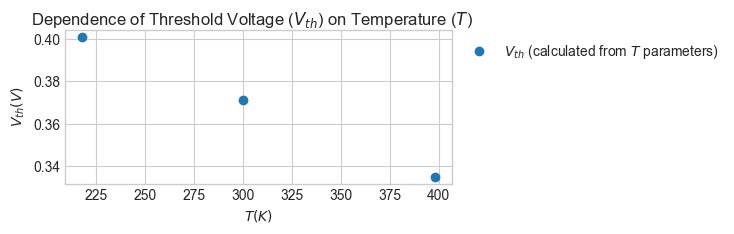

In [5]:
fig,axes = plt.subplots(figsize=(5,2))
fig.suptitle('Dependence of Threshold Voltage ($V_{th}$) on Temperature ($T$)')
plt.scatter([218,300,398],[VThreshold(T=218, vth0=0.371, NDEP=2.39e18, k1=0.58).VTH(),VThreshold(T=300, vth0=0.371, NDEP=1.5e18, k1=0.459).VTH(),\
                           VThreshold(T=398, vth0=0.371, NDEP=9.2e17, k1=0.36).VTH()],label='$V_{th}$ (calculated from $T$ parameters)')
axes.legend(bbox_to_anchor=(1, 1), loc="upper left")
axes.set_xlabel('$T (K)$')
axes.set_ylabel('$V_{th} (V)$')

### Summary <a class="anchor" id="section_3_1_1"></a>

1. The $V_{th}(T)$ shifts for 130nm NMOS calculated from the $T$ parameter extracts using [Eq. (3)](#eq3) - [Eq. (9)](#eq9) and as plotted above, are in line with a decreasing $V_T$ with increasing $T$ as can be seen in the simulated Output IV and Transfer IV curves of **[Part I](#section_1_1)** and **[Part II](#section_2_1)**.

## Calculation of $T$ Parameters for $\mu$ (all units appropriated from 'Nano-CMOS' compact model, $TEMPMOD/MOBMOD = 0$) <a class="anchor" id="section_3_2"></a>

<a id="eq10"></a>
$$
\begin{equation}\tag{10}
U0(T) = U0(\text{TNOM})\cdot\left(\frac{T}{\text{TNOM}}\right)^{\text{UTE}}
\end{equation}
$$

<a id="eq11"></a>
$$
\begin{equation}\tag{11}
UA(T) = UA(\text{TNOM})+UA1\cdot\left(\frac{T}{\text{TNOM}}-1\right)
\end{equation}
$$

<a id="eq12"></a>
$$
\begin{equation}\tag{12}
UB(T) = UB(\text{TNOM})+UB1\cdot\left(\frac{T}{\text{TNOM}}-1\right)
\end{equation}
$$

<a id="eq13"></a>
$$
\begin{equation}\tag{13}
UC(T) = UC(\text{TNOM})+UC1\cdot\left(\frac{T}{\text{TNOM}}-1\right)
\end{equation}
$$

([Eqs. (10)](#eq10) - [(13)](#eq13) as noted in page 106 of **[[2] BSIM 4.8.2 Technical Manual](http://bsim.berkeley.edu/models/bsim4/)**)

In [6]:
ute, ua, ua1, ub, ub1, uc, uc1, TNOM = -1.5, 6e-10, 4.31e-9, 1.2e-18, 7.61e-18, 0, -5.6e-11, 300  # Nano-CMOS compact model constant parameter extracts

In [7]:
class mu: 
    def __init__(self, u0:float, T:float): 
        self.u0 = u0
        self.ute = ute
        self.ua = ua
        self.ua1 = ua1
        self.ub = ub
        self.ub1 = ub1
        self.uc = uc
        self.uc1 = uc1
        self.TNOM = TNOM
        self.T = T
    
    def mu0(self) -> float:
        # calculates Low-field mobility according to eq (8)
        x = self.u0*((self.T/self.TNOM)**self.ute)
        return x
    
    def mua(self) -> float:
        # calculates `Coefficient of first-order mobility degradation due to vertical field' according to eq (9)
        x = self.ua + ua1*((self.T/self.TNOM)-1)
        return x

    def mub(self) -> float:
        # calculates `Coefficient of secon-order mobility degradation due to vertical field' according to eq (10) 
        x = self.ub + ub1*((self.T/self.TNOM)-1)
        return x

    def muc(self) -> float:
        # calculates `Coefficient of mobility degradation due to body-bias effect' according to eq (11)
        x = self.uc + uc1*((self.T/self.TNOM)-1)
        return x

In [8]:
print(f"Calculated u0 values (218K,300K,398K): {mu(T=218, u0=0.05979).mu0()},{mu(T=300, u0=0.05979).mu0()},{mu(T=398, u0=0.05979).mu0()}")
print(f"Calculated ua values (218K,300K,398K): {mu(T=218, u0=0.05979).mua()},{mu(T=300, u0=0.05979).mua()},{mu(T=398, u0=0.05979).mua()}")
print(f"Calculated ub values (218K,300K,398K): {mu(T=218, u0=0.05979).mub()},{mu(T=300, u0=0.05979).mub()},{mu(T=398, u0=0.05979).mub()}")
print(f"Calculated uc values (218K,300K,398K): {mu(T=218, u0=0.05979).muc()},{mu(T=300, u0=0.05979).muc()},{mu(T=398, u0=0.05979).muc()}")
#Note that ua/ub/uc~0

Calculated u0 values (218K,300K,398K): 0.09652186284786184,0.05979,0.039127835808042494
Calculated ua values (218K,300K,398K): -5.780666666666668e-10,6e-10,2.0079333333333334e-09
Calculated ub values (218K,300K,398K): -8.800666666666667e-19,1.2e-18,3.685933333333333e-18
Calculated uc values (218K,300K,398K): 1.5306666666666665e-11,0.0,-1.8293333333333334e-11


<u><center> Table summarising $T$ parameter extracts from Nano-CMOS compact model relating to $\mu$ </center></u>

| $$T~(K)$$ | $$u0~(m^2/V\cdot s)$$ | $$\text{u0(TNOM) }(m^2/V\cdot s)$$ $$\text{or u0 @ T = TNOM}$$ | $$ute$$ | $$ua~(m/V)$$ | $$ua1~(m/V)$$ | $$ub~(m^2/V^2)$$ | $$ub1~(m^2/V^2)$$ | $$uc~(m/V^2)$$ | $$uc1~(m/V^2)$$ |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| $218$ | 0.05036 | 0.05979 | -1.5 | 6e-10 | 4.31e-9 | 1.2e-18 | 7.61e-18 | 0 | -5.6e-11 |
| $300$ | 0.05979 | 0.05979  | -1.5 | 6e-10 | 4.31e-9 | 1.2e-18 | 7.61e-18 | 0 | -5.6e-11 |
| $398$ | 0.0689 | 0.05979 | -1.5 | 6e-10 | 4.31e-9 | 1.2e-18 | 7.61e-18 | 0 | -5.6e-11 |

Text(0, 0.5, '$\\mu$')

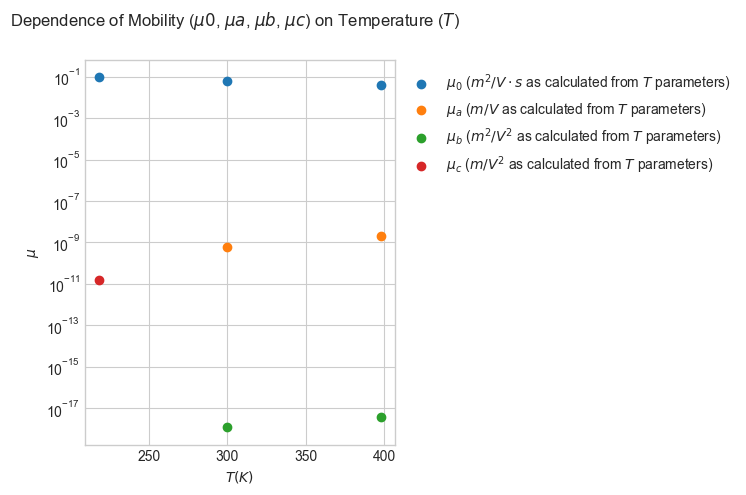

In [9]:
fig,axes = plt.subplots(figsize=(4,5))
fig.suptitle('Dependence of Mobility ($\mu 0$, $\mu a$, $\mu b$, $\mu c$) on Temperature ($T$)')
plt.scatter([218,300,398],[mu(T=218, u0=0.05979).mu0(), mu(T=300, u0=0.05979).mu0(), mu(T=398, u0=0.05979).mu0()],label='$\mu_0$ ($m^2/V\cdot s$ as calculated from $T$ parameters)')
plt.scatter([218,300,398],[mu(T=218, u0=0.05979).mua(), mu(T=300, u0=0.05979).mua(), mu(T=398, u0=0.05979).mua()],label='$\mu_a$ ($m/V$ as calculated from $T$ parameters)')
plt.scatter([218,300,398],[mu(T=218, u0=0.05979).mub(), mu(T=300, u0=0.05979).mub(), mu(T=398, u0=0.05979).mub()],label='$\mu_b$ ($m^2/V^2$ as calculated from $T$ parameters)')
plt.scatter([218,300,398],[mu(T=218, u0=0.05979).muc(), mu(T=300, u0=0.05979).muc(), mu(T=398, u0=0.05979).muc()],label='$\mu_c$ ($m/V^2$ as calculated from $T$ parameters)')
plt.yscale('log')
axes.legend(bbox_to_anchor=(1, 1), loc="upper left")
axes.set_xlabel('$T (K)$')
axes.set_ylabel('$\mu$')

### Summary <a class="anchor" id="section_3_2_1"></a>

1. Mobility $(\mu_0)$ decreases with increasing $T$ while mobility coefficients $(\mu_a, \mu_b, \mu_c)$ increase with $T$. This is due to an incresing scattering of charge carriers with increasing $T$ inside the MOS channel lattice. 
2. This effect cannot be seen qualitatively in the plots of **[Section 1](#section_1_1)** and **[Section 2](#section_2_1)**, which is due to other competing effects like channel length modulation and lowering $V_T$ with increasing $T$.

<br><hr>
# Part IV: 45nm NMOS corner simulations <a class="anchor" id="section_4"></a>

### <u><center> Table summarising Process Variability-Sensitive Global Device Parameter extracts from Nano-CMOS compact model relating to corner simulations </center></u>
(parameters as noted in Table 8.2 of  **[[1]](https://library.oapen.org/viewer/web/viewer.html?file=/bitstream/handle/20.500.12657/25859/1004227.pdf?sequence=1&isAllowed=y)**)

| $$\text{Corner}$$ $$\text{Modeling}$$ | $$vth0~(V)$$ | $$xl~(m)$$ | $$toxe/toxm~(m)$$  | $$u0~(m^2/V\cdot s)$$ | $$k1~(V^{1/2})$$ | $$rdsw~(\Omega (\mu m)^{WR})$$ | $$cgsl/cgdl~(F/m)$$ | $$cgso/cgdo~(F/m)$$ | $$cjs/cjd~(F/m^2)$$ | $$cjsws/cjswd~(F/m)$$ | $$cjswgs/cjswgd~(F/m)$$ |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Nominal | 0.41 | -2e-8 | 1.75-9 | 0.04805 | 0.477 | 150 | 2.653e-10 | 1.1e-10 | 0.0005 | 5e-10 | 3e-10/5e-10 |
| Fast-Fast | 0.379 | -2e-8 | 1.75-9 | 0.05045 | 0.45 | 150 | 2.653e-10 | 1.1e-10 | 0.0005 | 5e-10 | 3e-10/5e-10 |
| Slow-Slow | 0.439 | -2e-8 | 1.75-9 | 0.04588 | 0.502 | 150 | 2.653e-10 | 1.1e-10 | 0.0005 | 5e-10 | 3e-10/5e-10 |

### Summary <a class="anchor" id="section_4_1_1"></a>

1. Since the only varying parameters in the table above are vth0, u0 and k1; key Nano-CMOS compact model parameters for the Nominal, Fast-Fast and Slow-Slow corners are: vth0, u0 and k1.

<br><hr>
# References

* [1] **[Compact Models For Integrated Circuit Design - Samar K. Saha](https://library.oapen.org/viewer/web/viewer.html?file=/bitstream/handle/20.500.12657/25859/1004227.pdf?sequence=1&isAllowed=y)**
* [2] **[BSIM 4.8.2 Technical Manual](http://bsim.berkeley.edu/models/bsim4/)**
* [3] **[BSIM 4.3.0 Technical Manual](http://bsim.berkeley.edu/models/bsim4/)**

<br><hr>
# Additional information

<b>Created by:</b> Rochish Manda, MSc KTH

<b>IH2653 Examiner:</b> Dr. Gunnar Malm, Professor KTH

<b>Data and config files at:</b> **[Github](https://github.com/Rochish-Manda/IH2653/)**